**Regression Metrics**
1. MSE
2. MAE 
3. RMSE
4. R2 Score 
5. Adjusted R2 Score

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\SLR_placement.csv")

In [6]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


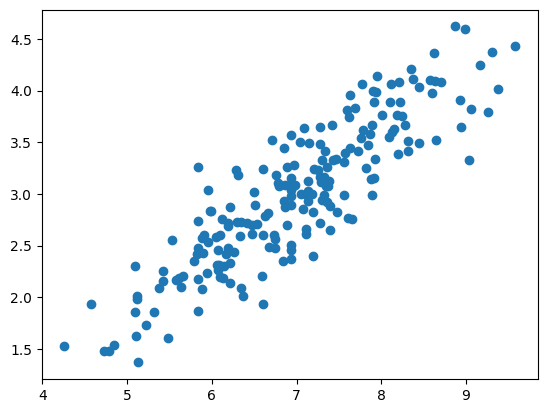

In [7]:
plt.scatter(df['cgpa'],df['package'])

In [8]:
X = df.iloc[:,0:1]
Y = df.iloc[:,-1]

In [9]:
X

,cgpa
0,6.89
1,5.12
2,7.82
3,7.42
4,6.94
...,...
195,6.93
196,5.89
197,7.21
198,7.63


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lr = LinearRegression()

In [13]:
lr.fit(X_train,Y_train)

LinearRegression()

In [14]:
X_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [15]:
Y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

In [16]:
lr.predict(X_test.iloc[2].values.reshape(1,1))

C:\Users\Aditya kumar Dubey\anaconda3\envs\dubey\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.38464568])

Text(0, 0.5, 'Package(in LPA)')

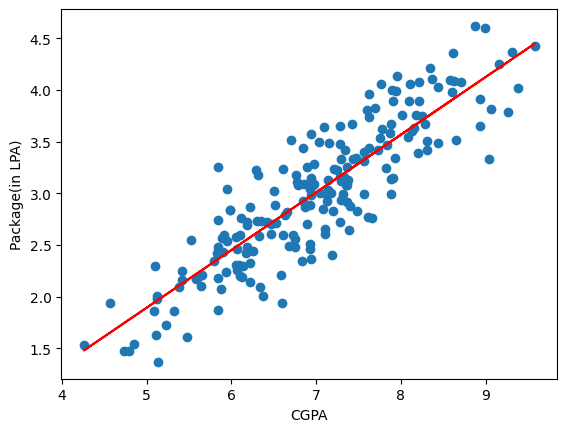

In [17]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train), color = 'red')
plt.xlabel('CGPA')
plt.ylabel('Package(in LPA)')

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [27]:
y_pred = lr.predict(X_test)

In [24]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [33]:
#lpa
print('MAE',mean_absolute_error(Y_test,y_pred))

MAE 0.2884710931878175


In [34]:
print("MSE",mean_squared_error(Y_test,y_pred))

MSE 0.12129235313495527


In [35]:
#lpa
print('RMSE',np.sqrt(mean_squared_error(Y_test,y_pred)))

RMSE 0.34827051717731616


In [37]:
print("R2_Score",r2_score(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)

R2_Score 0.780730147510384


In [38]:
# Adjested r2 score
X_test.shape

(40, 1)

In [39]:
1 - (1-r2)*(40-1)/(40-1-1)

0.7749598882343415

In [40]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.405748,3.26
1,5.12,0.980571,1.98
2,7.82,0.516054,3.25
3,7.42,0.758769,3.67
4,6.94,0.095742,3.57


Text(0, 0.5, 'Package(in lpa)')

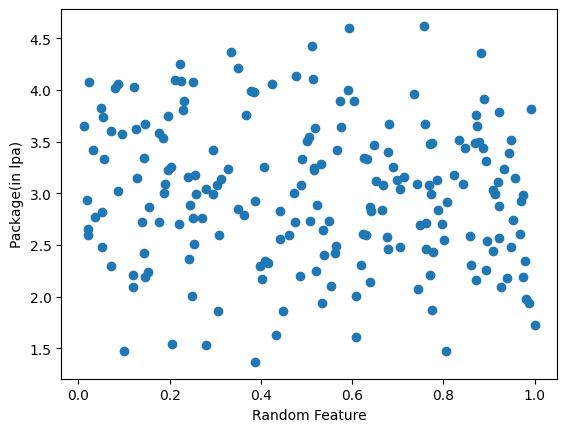

In [42]:
plt.scatter(new_df1['random_feature'], new_df1['package'])
plt.xlabel("Random Feature")
plt.ylabel("Package(in lpa)")

In [89]:
X = new_df1.iloc[:,0:2].values
y = new_df1.iloc[:,-1].values

In [105]:
X_trains,X_test,y_trains,y_test = train_test_split(X,y,test_size = 0.2, random_state = 21)

In [106]:
lr1 = LinearRegression()

In [107]:
lr1.fit(X_trains,y_trains)

LinearRegression()

In [108]:
y_pred = lr1.predict(X_test)

In [109]:
print('R2 Score',r2_score(y_test,y_pred))

R2 Score 0.8129143281959478


In [110]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print("Average R² Score:", scores.mean())

Cross-Validation R² Scores: [0.75406238 0.79053183 0.75365015 0.77691532 0.70725233]
Average R² Score: 0.7564824017189563


In [114]:
new_df2 = df.copy()
new_df2['iq'] = new_df2['package']+(np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [115]:
new_df2.head()

,cgpa,iq,package
0,6.89,3.36,3.26
1,5.12,2.58,1.98
2,7.82,3.45,3.25
3,7.42,3.37,3.67
4,6.94,2.77,3.57


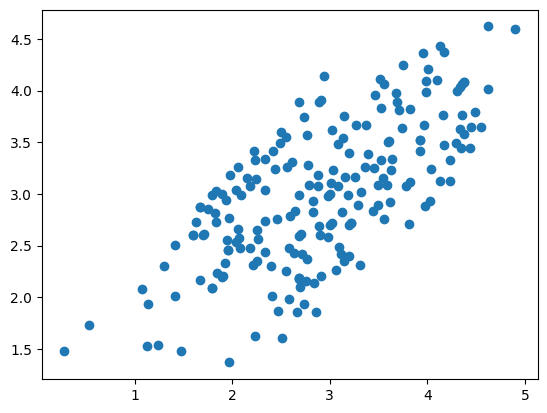

In [118]:
plt.scatter(new_df2['iq'], new_df2['package'])

In [119]:
X = new_df2.iloc[:,0:2].values
y = new_df2.iloc[:,-1].values

In [120]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [121]:
lr1.fit(X_train,y_train)

LinearRegression()

In [122]:
y_pred = lr1.predict(X_test)

In [125]:
r2_score(y_test,y_pred)

0.7911838779831746